In [1]:
!git clone https://github.com/ltt14/PRODIGY_ML_05.git

Cloning into 'PRODIGY_ML_05'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 398.34 KiB | 24.90 MiB/s, done.


In [2]:
#Important Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
import os
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /content


In [4]:
# Install Kaggle CLI
!pip install -q kaggle

# Move the kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the Food-101 dataset from Kaggle
!kaggle datasets download -d dansbecker/food-101

# Unzip the dataset
!unzip -o food-101.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/food-101/food-101/images/tacos/1030289.jpg  
  inflating: /content/food-101/food-101/images/tacos/1033196.jpg  
  inflating: /content/food-101/food-101/images/tacos/1036030.jpg  
  inflating: /content/food-101/food-101/images/tacos/1042175.jpg  
  inflating: /content/food-101/food-101/images/tacos/1044043.jpg  
  inflating: /content/food-101/food-101/images/tacos/1058697.jpg  
  inflating: /content/food-101/food-101/images/tacos/1059239.jpg  
  inflating: /content/food-101/food-101/images/tacos/1059326.jpg  
  inflating: /content/food-101/food-101/images/tacos/1066762.jpg  
  inflating: /content/food-101/food-101/images/tacos/1070967.jpg  
  inflating: /content/food-101/food-101/images/tacos/1073468.jpg  
  inflating: /content/food-101/food-101/images/tacos/1075296.jpg  
  inflating: /content/food-101/food-101/images/tacos/1085243.jpg  
  inflating: /content/food-101/food-101/images/tacos/108529.jpg  
  inflating:

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the images folder
dataset_path = "/content/food-101/food-101/images"

# Set up the ImageDataGenerator for data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotation of up to 30 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    validation_split=0.2  # Split data into 80% training, 20% validation
)

# Create the training generator
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),  # Resize images to 224x224 (commonly used in pre-trained models)
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Set as training data
)

# Create the validation generator
validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Check how many classes and images are in the dataset
print(f"Training batches: {train_generator.samples // train_generator.batch_size}")
print(f"Validation batches: {validation_generator.samples // validation_generator.batch_size}")


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
Training batches: 2525
Validation batches: 631


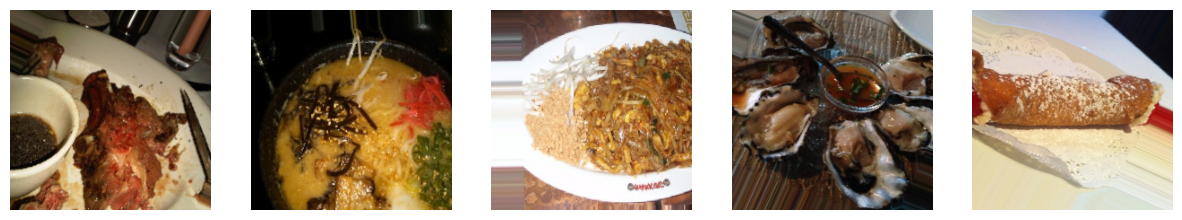

In [7]:
#Visualize Sample Data
import matplotlib.pyplot as plt

# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Display a few random images from the batch
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    ax = axes[i]
    ax.imshow(x_batch[i])  # Display image
    ax.axis('off')
plt.show()

In [8]:
from sklearn.utils import class_weight
import numpy as np

# Get the class labels from the generator
labels = train_generator.classes

# Calculate class weights for the classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Map the class weights to class indices
class_weight_dict = dict(zip(np.unique(labels), class_weights))

# Print class weights
print(f"Class weights: {class_weight_dict}")


Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92: 1.0, 93: 1.0, 94: 1.0, 95: 1.0, 96: 1.0, 97: 1.0, 98: 1.0, 99: 1.0, 100: 1.0}


In [9]:
#Import Pre-trained ResNet50
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',  # Load pre-trained weights from ImageNet
    include_top=False,   # Exclude the fully connected layers (we'll add our own)
    input_shape=(224, 224, 3)  # Set input shape to match image dimensions
)

# Freeze the base model (prevent its weights from being updated during training)
base_model.trainable = False

# Print model summary
base_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
#Add Custom Layers(Remember when we said we'd add our own?)
# Build the model on top of ResNet50
model = models.Sequential([
    base_model,  # Use the pre-trained ResNet50 as the base model
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce the spatial dimensions
    layers.Dense(1024, activation='relu'),  # Fully connected layer with 1024 units
    layers.Dropout(0.5),  # Dropout layer to avoid overfitting
    layers.Dense(101, activation='softmax')  # Output layer for 101 classes (Food-101 dataset)
])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │         103,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,789,413 (98.38 MB)

 Trainable params: 2,201,701 (8.40 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
#Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Adam optimizer (good default choice)
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

In [ ]:
# Train the model
history = model.fit(
    train_generator,  # Training data
    epochs=7,  # Number of epochs
    validation_data=validation_generator,  # Validation data
    class_weight=class_weight_dict  # Include class weights if needed
)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2117/2525 ━━━━━━━━━━━━━━━━━━━━ 3:20 493ms/step - accuracy: 0.0106 - loss: 4.6410

In [ ]:
#Fine-Tuning the Model
# Unfreeze the top layers of the ResNet50 base model (trainable layers)
base_model.trainable = True

# Freeze all layers up to the 100th layer and unfreeze the rest
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompile the model after unfreezing layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model for a few epochs
history_fine = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weight_dict
)

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Save the trained model
model.save('food101_model.h5')

In [ ]:
#Visualize Training History
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()